========================================================
# Query Simbad on CALSPEC sources
========================================================

- author Sylvie Dagoret-Campagne
- Affiliation LAL-IN2P3-CNRS
- Work : LSST & StarDice
- date May 4th 2017
- update May 19th 2017



Attention parfois la récupération de la localisation par adresse échoue à cause de google.
Relancer la cellule à la main plusieurs fois.

# Configuration with packages
---------------------------------------------

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import os
import re

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [4]:
os.environ['PYSYN_CDBS']

'/Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs'

In [5]:
import astropy
from astropy.io import fits
import pysynphot as S

In [6]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo

In [7]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)


In [8]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [9]:
from datetime import datetime
from pytz import timezone
import pytz

In [10]:
from pytz import all_timezones,common_timezones

In [11]:
from astroquery.simbad import Simbad

In [12]:
from astropy.coordinates import get_sun,get_moon

# Initialisation

## Simbad

In [13]:
Simbad.list_votable_fields()

--NOTES--

1. The parameter filtername must correspond to an existing filter. Filters include: B,V,R,I,J,K.  They are checked by SIMBAD but not astroquery.simbad

2. Fields beginning with rvz display the data as it is in the database. Fields beginning with rv force the display as a radial velocity. Fields beginning with z force the display as a redshift

3. For each measurement catalog, the VOTable contains all fields of the first measurement. When applicable, the first measurement is the mean one. 

Available VOTABLE fields:

          col0                   col1              col2     
------------------------ -------------------- --------------
      bibcodelist(y1-y2) fluxdata(filtername)       plx_qual
                     cel                 gcrv             pm
                    cl.g                  gen     pm_bibcode
                coo(opt)                   gj   pm_err_angle
             coo_bibcode                 hbet    pm_err_maja
           coo_err_angle                

In [14]:
Simbad.get_field_description ('flux(filtername)') 


value of the flux for the given filter


In [15]:
Simbad.get_votable_fields()

['main_id', 'coordinates']

## Defines the configuration of my own Simbad

In [16]:
customSimbad = Simbad()

In [17]:
customSimbad.add_votable_fields('flux(U)','flux(B)','flux(V)','flux(R)','flux(I)','flux(J)')

In [18]:
result_table = customSimbad.query_object('VEGA')   # Ask Simbad ALPHA_LYR

In [19]:
print result_table

 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... ------ ------ -----------
* alf Lyr 18 36 56.3363 +38 47 01.280       9 ...   0.07    0.1 -0.18000001


## Times zones

In [20]:
#common_timezones

## Observatory sites

In [21]:
#EarthLocation.get_site_names()

### Set Observation Time

In [22]:
observationtime=datetime(2017, 6, 26)

### CTIO

- http://www.ctio.noao.edu/noao/
- http://ast.noao.edu/facilities/ctio

 	
- Coordinates :	30°10′10.78″S 70°48′23.49″ , WCoordinates: 30°10′10.78″S 70°48′23.49″W
- Altitude 	  : 2,207 metres 

#### CTIO time and Time zone and UTC Offset

In [23]:
CTIO_OBS_time=datetime(2017, 6, 1,0,0,0)

In [24]:
CTIO_TZ = timezone('America/Santiago')

In [25]:
td=CTIO_TZ.utcoffset(CTIO_OBS_time, is_dst=True)

In [26]:
timeshift_hours=td.days*24+td.seconds/3600.

In [27]:
CTIO_UTC_OFFSET=int(timeshift_hours)

In [28]:
print 'CTIO_UTC_OFFSET = ', CTIO_UTC_OFFSET

CTIO_UTC_OFFSET =  -4


#### CTIO Location

In [29]:
CTIO_OBS_loc=EarthLocation.of_site('Cerro Tololo Interamerican Observatory')

In [30]:
CTIO_OBS_loc.to_geodetic()

(<Longitude -70.815 deg>,
 <Latitude -30.165277777777778 deg>,
 <Quantity 2214.9999999993697 m>)

### My Work

In [31]:
WORK_OBS_time=datetime(2017, 5, 19,0,0,0) # Choose Today evening

In [32]:
WORK_TZ = timezone('Europe/Paris')

In [33]:
td=WORK_TZ.utcoffset(WORK_OBS_time, is_dst=True)

In [34]:
timeshift_hours=td.days*24+td.seconds/3600.

In [35]:
WORK_UTC_OFFSET=int(timeshift_hours)

In [36]:
print 'WORK_UTC_OFFSET',WORK_UTC_OFFSET

WORK_UTC_OFFSET 2


### My local time

Attention parfois la récupération de la localisation par adresse échoue à cause de google.
Relancer la cellule à la main plusieurs fois :

In [37]:
WORK_OBS_loc=EarthLocation.of_address('Laboratoire accelerateur lineaire, Universite Paris Sud, Orsay, FRANCE,',get_height=True)
WORK_OBS_loc.to_geodetic()

(<Longitude 2.1709371 deg>,
 <Latitude 48.69931509999999 deg>,
 <Quantity 60.069522858033785 m>)

### OHP

- http://www.obs-hp.fr/info.shtml

- Longitude = 5° 42' 44" E 
- Latitude = +43° 55' 54"

#### Observation Time

In [38]:
OHP_OBS_time=datetime(2017, 6, 20,0,0,0)

In [39]:
OHP_TZ = timezone('Europe/Paris')

In [40]:
td=OHP_TZ.utcoffset(OHP_OBS_time, is_dst=True)

In [41]:
timeshift_hours=td.days*24+td.seconds/3600.

In [42]:
OHP_UTC_OFFSET=int(timeshift_hours)

In [43]:
print 'OHP_UTC_OFFSET = ', OHP_UTC_OFFSET

OHP_UTC_OFFSET =  2


#### Location

Attention parfois la récupération de la localisation par adresse échoue à cause de google.
Relancer la cellule à la main plusieurs fois.

In [44]:
# Use Google to get earth location from adress
OHP_OBS_loc=EarthLocation.of_address('Observatoire de Haute Provence, FRANCE',get_height=True)

In [45]:
OHP_OBS_loc.to_geodetic()

(<Longitude 5.71362 deg>,
 <Latitude 43.930415 deg>,
 <Quantity 639.0343627919294 m>)

### LSST

In [46]:
LSST_OBS_loc=EarthLocation.of_site('Cerro Pachon')

In [47]:
LSST_OBS_loc.to_geodetic()

(<Longitude -70.7366833333333 deg>,
 <Latitude -30.240741666666672 deg>,
 <Quantity 2749.999999999238 m>)

# Query Simbad:
https://astroquery.readthedocs.io/en/latest/simbad/simbad.html

In [48]:
from astroquery.simbad import Simbad

In [49]:
SEDfile_dir=os.path.join(os.environ['PYSYN_CDBS'], 'calspec')

In [50]:
filelist=os.listdir(SEDfile_dir) 

In [51]:
filelist

['10lac_stis_001.fits',
 '10lac_stis_002.fits',
 '10lac_stis_003.fits',
 '1732526_nic_002.fits',
 '1732526_stisnic_001.fits',
 '1732526_stisnic_002.fits',
 '1732526_stisnic_003.fits',
 '1740346_nic_001.fits',
 '1740346_nic_002.fits',
 '1740346_stisnic_001.fits',
 '1740346_stisnic_002.fits',
 '1740346_stisnic_003.fits',
 '1743045_nic_001.fits',
 '1743045_nic_002.fits',
 '1743045_stisnic_001.fits',
 '1743045_stisnic_002.fits',
 '1743045_stisnic_003.fits',
 '1757132_stis_001.fits',
 '1757132_stis_002.fits',
 '1757132_stis_003.fits',
 '1802271_nic_002.fits',
 '1802271_stisnic_001.fits',
 '1802271_stisnic_002.fits',
 '1802271_stisnic_003.fits',
 '1805292_nic_001.fits',
 '1805292_nic_002.fits',
 '1805292_stisnic_001.fits',
 '1805292_stisnic_002.fits',
 '1805292_stisnic_003.fits',
 '1808347_stis_001.fits',
 '1808347_stis_002.fits',
 '1808347_stis_003.fits',
 '1812095_nic_001.fits',
 '1812095_nic_002.fits',
 '1812095_stisnic_001.fits',
 '1812095_stisnic_002.fits',
 '1812095_stisnic_003.fits',


# Query CALSPEC database


Look at PySynphot data and return the filename

## Extract the fits file headers of CALSPEC

In [52]:
star_header = []
star_file_calspec = []
for filename in filelist:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(os.environ['PYSYN_CDBS'], 'calspec',filename)
        hdr = fits.getheader(fullfilename)
        star_header.append(hdr)
        star_file_calspec.append(filename)

    START STIS                                                                   [astropy.io.fits.card]
FILE WRITTEN BY ECHLREDUCE.PRO ON 11-Jun-2013 11:27:39.00                        [astropy.io.fits.card]
coadd list for E*H:                                                              [astropy.io.fits.card]
 o57u01030 obb001040 obb005010 obb005020 obb001010 obb001090 obb005030           [astropy.io.fits.card]
 obb005040 obb001060 obb001030 o57u01020 obb001050 obb001020 obb0010a0           [astropy.io.fits.card]
 obb001070 o6hb100f0 obb001080 o57u01040 o5i011010 o5i011020 o5i011030           [astropy.io.fits.card]
 obb0010b0 obb002090 obb0020b0 obb002010 obb002030 o6hb20060 obb002020           [astropy.io.fits.card]
 o6hb20070 obb002040 o6hb20080 obb002050 obb002060 o6hb20090 obb002070           [astropy.io.fits.card]
 obb002080 obb0020a0 obb0020c0 obb0020d0 obb004080 obb053040 obb053080           [astropy.io.fits.card]
 obb053010 obb053020 obb053030 obb053050 obb053060 obb0530a0 obb

In [53]:
len(star_header)

434

In [54]:
len(star_file_calspec)

434

In [55]:
star_header[1][7] # TARGETID

'10LAC'

## Extract the object name from the headers of fits file

In [56]:
star_names = []
index=0
for hdr in star_header:    
    star_name=star_header[index][7]
    star_names.append(star_name)
    index+=1

In [57]:
len(star_names)

434

### Star names from fits file

There is much blabla

In [58]:
print star_names

['10LAC', '10LAC', '10LAC', '1732526 with NICMOS observations', '1732526', '1732526', '1732526', '1740346 with NICMOS observations', '1740346 with NICMOS observations', '1740346', '1740346', '1740346', '1743045 with NICMOS observations', '1743045 with NICMOS observations', '1743045', '1743045', '1743045', '1757132', '1757132', '1757132', '1802271 with NICMOS observations', '1802271', '1802271', '1802271', '1805292 with NICMOS observations', '1805292 with NICMOS observations', '1805292', '1805292', '1805292', '1808347', '1808347', '1808347', '1812095 with NICMOS observations', '1812095 with NICMOS observations', '1812095', '1812095', '1812095', '1812524 with NICMOS observations', '1812524', '1812524', '2M0036+18 with STIS & NICMOS observations', '2M0036+18 with STIS & NICMOS observations', 'Standard star flux with re-calibrated STIS & NICMOS observations---', '2M0036+18', '2M0036+18', '2M0036+18', '2M0559-14 with STIS & NICMOS observations', '2M0559-14 with STIS & NICMOS observations', 

### Defines classes to Backup usefull information from Simbad

In [59]:
class CalibSpecStarSmb:
    """
    Class for the CALSPEC stars from Simbad Query
    """
    name = ""          # the name of the star from CALSPEC/Pysynphot
    simbadname=""      # the name of the star returned by Astroquery-Simbad 
    RA =""             # string Right assension
    DEC=""             # string declination
    U=0                # magnitudes
    B=0
    V=0
    R=0
    I=0
    J=0
    calspecfitsname=""

    def __init__(self, name,simbname,ra,dec,u,b,v,r,i,j,filename):   # constructor
        self.name=name
        self.simbname=simbname
        self.RA=ra
        self.DEC=dec
        self.U=u
        self.B=b
        self.V=v
        self.R=r
        self.I=i
        self.J=j
        self.calspecfitsname=filename
    def show(self):                             # print 
        print 'name=',self.name,', ra=',self.RA,', dec=',self.DEC, ' V=',self.V,'mag ','file = ',self.calspecfitsname
    def getName(self):                          # getters
        return self.name
    def getRA(self):
        return self.RA
    def getDEC(self):
        return self.DEC
    def getCalspecFile(self):
        return self.calspecfitsname

In [60]:
class CalibSpecStarSkc:
    """
    Class for the CALSPEC stars from SkyCoord Query
    """
    name = ""          # the name of the star from CALSPEC/Pysynphot
    RA =0             # number Right ascension in deg
    DEC=0             # number declination
    calspecfitsname=""

    skycoord=astropy.coordinates.SkyCoord.from_name("VEGA")  # creazy init with Vega

    def __init__(self, name,ra,dec,filename):   # constructor
        self.name=name
        self.RA=ra
        self.DEC=dec
        self.skycoord=astropy.coordinates.SkyCoord.from_name(name)
        self.calspecfitsname=filename
        
    def show(self):                             # print 
        #print 'name=',self.name,', ra=',self.RA,', dec=',self.DEC
        print 'name',self.name,' :: ', self.skycoord, ' ', self.calspecfitsname
    def getName(self):                          # getters
        return self.name
    def getRA(self):
        return self.RA
    def getDEC(self):
        return self.DEC 
    def getSkyCoord(self):
        return self.skycoord
    def getCalspecFile(self):
        return self.calspecfitsname

## Loop on entries to get info on coordinates on CALSPEC from Simbad

- This is a way to sort the good name for stars
- Can access to different magntitudes
- Moreover it does not crash if Simbad does not recognize a name

In [61]:
All_CALSPEC_Stars_InSimbad = {} #dictionnary of stars recognized inside Simbad
count = 0
index = 0
for name in star_names: # loop on star names from Pysynphot-CALSPEC
    
    result_table = customSimbad.query_object(name)   # Ask Simbad, Simbad does what it can with name
    if result_table != None:                   #check if Simbad has found the star
        count+=1
        filen=star_file_calspec[index]
        print "---------------------",count,') ',name,'---------------',filen
        print result_table
        # create an object with the found star
        #----------------------------------------
        newstar=CalibSpecStarSmb(name,result_table["MAIN_ID"][0],result_table["RA"][0],result_table["DEC"][0],result_table["FLUX_U"][0],result_table["FLUX_B"][0],result_table["FLUX_V"][0],result_table["FLUX_R"][0],result_table["FLUX_I"][0],result_table["FLUX_J"][0],filen)
        # fill the dictionnary only if there is no instance of that star already in dictionnary
        if not newstar.getName() in All_CALSPEC_Stars_InSimbad.keys():
            All_CALSPEC_Stars_InSimbad[newstar.getName()]= newstar # fill the directionary with the new star- object
    index+=1
            

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astropy/table/table.py:2517: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  result = (self.as_array().data == other) & (self.mask == false_mask)
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1732526 with NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1732526': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packa

--------------------- 1 )  10LAC --------------- 10lac_stis_001.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- ------------- ------------- ------- ... ------ --------- ---------
*  10 Lac 22 39 15.6786 +39 03 00.971       9 ...   4.98 5.1900001 5.3899999
--------------------- 2 )  10LAC --------------- 10lac_stis_002.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- ------------- ------------- ------- ... ------ --------- ---------
*  10 Lac 22 39 15.6786 +39 03 00.971       9 ...   4.98 5.1900001 5.3899999
--------------------- 3 )  10LAC --------------- 10lac_stis_003.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- -------------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1757132': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1802271 with NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1802271': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/l

--------------------- 4 )  ALPHA_LYR --------------- alpha_lyr_stis_006.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... ------ ------ -----------
* alf Lyr 18 36 56.3363 +38 47 01.280       9 ...   0.07    0.1 -0.18000001
--------------------- 5 )  ALPHA_LYR --------------- alpha_lyr_stis_007.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... ------ ------ -----------
* alf Lyr 18 36 56.3363 +38 47 01.280       9 ...   0.07    0.1 -0.18000001
--------------------- 6 )  ALPHA_LYR --------------- alpha_lyr_stis_008.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
---------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME BD02D3375
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME BD17D4708 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'BD17D4708 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	BD : Bon

--------------------- 7 )  FEIGE110 --------------- feige110_stisnic_004.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
--------- ------------- ------------- ------- ... ------ ------ ------ ------
Feige 110 23 19 58.3981 -05 09 56.160       9 ...   11.5  11.97 12.145 12.548
--------------------- 8 )  FEIGE110 --------------- feige110_stisnic_005.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
--------- ------------- ------------- ------- ... ------ ------ ------ ------
Feige 110 23 19 58.3981 -05 09 56.160       9 ...   11.5  11.97 12.145 12.548
--------------------- 9 )  FEIGE110 --------------- feige110_stisnic_006.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...  mag    mag   

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME FEIGE34 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'g191b2b mod 004.fits': this identifier has an incorrect format for catalog: 	g : Giclas
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'Bohlin, R. C. 2009, in preparation': this identifier has an incorrect for

--------------------- 13 )  G191B2B --------------- g191b2b_stisnic_004.fits
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
               "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
----------- ------------- ------------- ------- ... ------ ------ ------ ------
BD+52   913 05 05 30.6128 +52 49 51.955       9 ...  11.69  11.93 12.108 12.543
--------------------- 14 )  G191B2B --------------- g191b2b_stisnic_005.fits
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
               "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
----------- ------------- ------------- ------- ... ------ ------ ------ ------
BD+52   913 05 05 30.6128 +52 49 51.955       9 ...  11.69  11.93 12.108 12.543
--------------------- 15 )  G191B2B --------------- g191b2b_stisnic_006.fits
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
               "h:m:s"       "d:m:s"            .

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME GD153 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'GD153 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	GD : Giclas, Dwarf
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'gd71 mod 005.fits': this identifier has an incorre

--------------------- 16 )  GD153 --------------- gd153_stisnic_004.fits
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
 GD 153 12 57 02.337 +22 01 52.68       7 ... 13.349 13.488 13.669 14.012
--------------------- 17 )  GD153 --------------- gd153_stisnic_005.fits
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
 GD 153 12 57 02.337 +22 01 52.68       7 ... 13.349 13.488 13.669 14.012
--------------------- 18 )  GD153 --------------- gd153_stisnic_006.fits
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ -------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'GD71 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	GD : Giclas, Dwarf
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : GJ  7541 A
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME AC +70D5824 with STIS observati

 19 )  GD71 --------------- gd71_stisnic_004.fits
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  GD 71 05 52 27.614 +15 53 13.75       7 ... 13.032 13.169 13.337 13.728
--------------------- 20 )  GD71 --------------- gd71_stisnic_005.fits
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  GD 71 05 52 27.614 +15 53 13.75       7 ... 13.032 13.169 13.337 13.728
--------------------- 21 )  GD71 --------------- gd71_stisnic_006.fits
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ -

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HD165459 with NICMOS observations
  (error.line, error.msg))


--------------------- 61 )  HD185975 --------------- hd185975_stis_001.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------
HD 185975 20 28 18.7284 -87 28 19.941       9 ...     --     -- 6.8629999
--------------------- 62 )  HD185975 --------------- hd185975_stis_002.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------
HD 185975 20 28 18.7284 -87 28 19.941       9 ...     --     -- 6.8629999
--------------------- 63 )  HD185975 --------------- hd185975_stis_003.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- --------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'HD209458 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	HD : Henry Draper
  (error.line, error.msg))


--------------------- 70 )  HD209458 --------------- hd209458_stisnic_004.fits
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
               "h:m:s"       "d:m:s"            ...  mag    mag      mag   
----------- ------------- ------------- ------- ... ------ ------ ---------
V* V376 Peg 22 03 10.7720 +18 53 03.543       9 ...     --     -- 6.5910001
--------------------- 71 )  HD209458 --------------- hd209458_stisnic_005.fits
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
               "h:m:s"       "d:m:s"            ...  mag    mag      mag   
----------- ------------- ------------- ------- ... ------ ------ ---------
V* V376 Peg 22 03 10.7720 +18 53 03.543       9 ...     --     -- 6.5910001
--------------------- 72 )  HD209458 --------------- hd209458_stisnic_006.fits
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
               "h:m:s"       "d:m:s"            ...  mag    mag      mag   
---

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HD93521 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HS2027 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HS2027
  (error.line, error.msg))
/Users/dago

--------------------- 88 )  HZ21 --------------- hz21_stis_002.fits
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
  HZ 21 12 13 56.25 +32 56 31.4       6        6 ... 14.688 14.837 15.038 15.351
--------------------- 89 )  HZ21 --------------- hz21_stis_003.fits
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
  HZ 21 12 13 56.25 +32 56 31.4       6        6 ... 14.688 14.837 15.038 15.351
--------------------- 90 )  HZ21 --------------- hz21_stis_004.fits
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag   

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'hz43 mod 004.fits': this identifier has an incorrect format for catalog: 	hz : Humason-Zwicky
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ43 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ43B with STIS observation

 )  HZ43 --------------- hz43_stis_004.fits
MAIN_ID       RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
------- ------------- ------------- ------- ... ------ ------ ------ ------
  HZ 43 13 16 21.8532 +29 05 55.379       9 ...  12.66     --     -- 10.373
--------------------- 94 )  HZ43B --------------- hz43b_stis_002.fits
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
 HZ 43B 13 16 21.630 +29 05 54.38       7 ...  12.66     --     -- 12.806
--------------------- 95 )  HZ43B --------------- hz43b_stis_003.fits
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ -

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ44 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ4 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME KF01T5 with NICMOS observations
  (error.line, erro

 100 )  HZ4 --------------- hz4_stis_003.fits
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
  HZ  4 03 55 21.99 +09 47 18.0       6        6 ... 14.506  14.58 14.642 14.831
--------------------- 101 )  HZ4 --------------- hz4_stis_004.fits
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
  HZ  4 03 55 21.99 +09 47 18.0       6        6 ... 14.506  14.58 14.642 14.831
--------------------- 102 )  HZ4 --------------- hz4_stis_005.fits
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- --

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME KF06T1 with NICMOS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME KF06T1
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME KF06T2 with NICMOS observations
  (error.line, error.msg))
/Users/d

--------------------- 103 )  LDS749B --------------- lds749b_stisnic_004.fits
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
LAWD 87 21 32 16.24 +00 15 14.4       6        6 ... 14.674 14.675 14.676 14.894
--------------------- 104 )  LDS749B --------------- lds749b_stisnic_005.fits
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
LAWD 87 21 32 16.24 +00 15 14.4       6        6 ... 14.674 14.675 14.676 14.894
--------------------- 105 )  LDS749B --------------- lds749b_stisnic_006.fits
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"        

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME P041C with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'P041C with STIS & NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME P 041C
  (error.line, error.msg))
/Users/dagoret

--------------------- 106 )  SIRIUS --------------- sirius_stis_001.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I   FLUX_J
             "h:m:s"       "d:m:s"            ...  mag      mag      mag  
--------- ------------- ------------- ------- ... ------ ---------- ------
* alf CMa 06 45 08.9172 -16 42 58.017       9 ...  -1.46 -1.4299999  -1.36
--------------------- 107 )  SIRIUS --------------- sirius_stis_002.fits
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I   FLUX_J
             "h:m:s"       "d:m:s"            ...  mag      mag      mag  
--------- ------------- ------------- ------- ... ------ ---------- ------
* alf CMa 06 45 08.9172 -16 42 58.017       9 ...  -1.46 -1.4299999  -1.36


/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'SNAP-1 with STIS & NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME SNAP-1
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'SNAP-2 with STIS & NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagor

--------------------- 108 )  VB8 --------------- vb8_stisnic_004.fits
 MAIN_ID        RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
---------- ------------ ------------ ------- ... ------ ------ ------ ------
GJ   644 C 16 55 35.293 -08 23 40.11       7 ... 16.916 14.566  12.24  9.776
--------------------- 109 )  VB8 --------------- vb8_stisnic_005.fits
 MAIN_ID        RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
---------- ------------ ------------ ------- ... ------ ------ ------ ------
GJ   644 C 16 55 35.293 -08 23 40.11       7 ... 16.916 14.566  12.24  9.776
--------------------- 110 )  VB8 --------------- vb8_stisnic_006.fits
 MAIN_ID        RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
---------- ---------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME Koester He Model
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME Standard star flux with STIS observations--------------------------
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD0320-539 with STIS 

--------------------- 114 )  WD0320-539 --------------- wd0320_539_stis_002.fits
MAIN_ID       RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
-------- ----------- ----------- ------- ... ------ ------ ------ ------
LB  1663 03 22 14.83 -53 45 16.5       6 ...   14.9  15.51  15.21  15.61
--------------------- 115 )  WD0320-539 --------------- wd0320_539_stis_003.fits
MAIN_ID       RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
-------- ----------- ----------- ------- ... ------ ------ ------ ------
LB  1663 03 22 14.83 -53 45 16.5       6 ...   14.9  15.51  15.21  15.61
--------------------- 116 )  WD0320-539 --------------- wd0320_539_stis_004.fits
MAIN_ID       RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
-------- ----------- ------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD0947 857
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD1026 453 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD1026 453
  (error.line, error.msg))
/Users/dagoret-campagne

--------------------- 117 )  WD1057+719 --------------- wd1057_719_stisnic_004.fits
  MAIN_ID        RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
              "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
----------- ----------- ----------- ------- ... ------ ------ ------ ------
PG 1057+719 11 00 34.24 +71 38 02.9       6 ...  14.68  15.23     -- 15.472
--------------------- 118 )  WD1057+719 --------------- wd1057_719_stisnic_005.fits
  MAIN_ID        RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
              "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
----------- ----------- ----------- ------- ... ------ ------ ------ ------
PG 1057+719 11 00 34.24 +71 38 02.9       6 ...  14.68  15.23     -- 15.472
--------------------- 119 )  WD1057+719 --------------- wd1057_719_stisnic_006.fits
  MAIN_ID        RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
              "h:m:s"     "d:m:s"           ...  mag    mag    m

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'WD1657+343 with STIS & NICMOS observations': this identifier has an incorrect format for catalogs: 	WD (
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'WDcovar.fits': this identifier has an incorrect format for catalogs: 	WD (
  (error.line, error.msg))


In [62]:
print " Number of CALSPEC stars recognised by Simbad : ",len(All_CALSPEC_Stars_InSimbad)

 Number of CALSPEC stars recognised by Simbad :  41


### shows list of CALSPEC stars from SimBad

In [63]:
print All_CALSPEC_Stars_InSimbad.keys()

['10LAC', 'HD205905', 'HD14943', 'HD37725', 'HD160617', 'FEIGE34', 'HD159222', 'HZ43', 'HZ44', 'HZ21', 'WD1057+719', 'HZ4', 'FEIGE110', 'HD031128', 'GD71', 'HD209458', 'SIRIUS', 'WD0320-539', 'HD111980', 'HD009051', 'HD60753', 'LDS749B', 'HD180609', 'HD158485', 'HD37962', 'HD163466', 'HD185975', 'G191B2B', 'HD116405', 'ALPHA_LYR', 'HD200654', 'HZ43B', 'WD1657+343', 'HD165459', 'HD93521', 'GD153', 'WD0308-565', 'HD38949', 'VB8', 'HD106252', 'HD074000']


## From SkyCoord, also get the coordinates of the star

We can check if SkyCoord also find the CALSPEC star recognized by Simbad

In [64]:
All_CALSPEC_Stars_InSkyCoord = {} #dictionnary of stars
for starnam in All_CALSPEC_Stars_InSimbad.keys():
    starloc=astropy.coordinates.SkyCoord.from_name(starnam)
    file=All_CALSPEC_Stars_InSimbad[starnam].getCalspecFile()
    newstar=CalibSpecStarSkc(starnam,starloc.ra.deg,starloc.dec.deg,file)
    All_CALSPEC_Stars_InSkyCoord [starnam] = newstar

In [65]:
print " Number of CALSPEC stars recognised by SkyCoord : ",len(All_CALSPEC_Stars_InSkyCoord)

 Number of CALSPEC stars recognised by SkyCoord :  41


In [66]:
print All_CALSPEC_Stars_InSkyCoord.keys()

['10LAC', 'HD205905', 'WD0320-539', 'HD37725', 'HD160617', 'FEIGE34', 'HD159222', 'HZ43', 'HZ44', 'HZ21', 'WD1057+719', 'HZ4', 'FEIGE110', 'HD031128', 'GD71', 'HD209458', 'SIRIUS', 'ALPHA_LYR', 'HD111980', 'HD009051', 'HD60753', 'LDS749B', 'HD180609', 'HD158485', 'HD37962', 'HD163466', 'HD185975', 'G191B2B', 'HD116405', 'HD14943', 'HD200654', 'HZ43B', 'WD1657+343', 'HD165459', 'HD93521', 'GD153', 'WD0308-565', 'HD38949', 'VB8', 'HD106252', 'HD074000']


In [67]:
for key, starobj in All_CALSPEC_Stars_InSkyCoord.iteritems():
    print starobj.show()

name 10LAC  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 339.81532766,  39.05026977)>   10lac_stis_001.fits
None
name HD205905  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 324.79229796, -27.30657448)>   hd205905_stis_001.fits
None
name WD0320-539  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 50.561792, -53.754583)>   wd0320_539_stis_002.fits
None
name HD37725  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 85.47654458,  29.29747917)>   hd37725_stis_001.fits
None
name HD160617  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 265.70551677, -40.32097928)>   hd160617_stis_001.fits
None
name FEIGE34  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 159.90308495,  43.10257086)>   feige34_stis_002.fits
None
name HD159222  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 263.00413544,  34.27114733)>   hd159222_stis_001.fits
None
name HZ43  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 199.0910417,  29.0987222)>   hz43_stis_002.fits
None
name HZ44  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 200.8969333,  

# Observation Definition


- We must adapt the observation site and date here

In [68]:
obs_site=OHP_OBS_loc
obs_date_time=Time(OHP_OBS_time)
obs_utc_offset=OHP_UTC_OFFSET

In [69]:
#obs_site=CTIO_OBS_loc
#obs_date_time=Time(CTIO_OBS_time)
#obs_utc_offset=CTIO_UTC_OFFSET

In [70]:
#obs_site=WORK_OBS_loc
#obs_date_time=Time(WORK_OBS_time)
#obs_utc_offset=WORK_UTC_OFFSET

In [71]:
print "*********************************************************************** "
print "* \t obs site    :: ", obs_site.to_geodetic()
print "* \t obs time    :: ", obs_date_time
print "* \t obs UTC off :: ", obs_utc_offset
print "*********************************************************************** "


*********************************************************************** 
* 	 obs site    ::  (<Longitude 5.71362 deg>, <Latitude 43.930415 deg>, <Quantity 639.0343627919294 m>)
* 	 obs time    ::  2017-06-20 00:00:00
* 	 obs UTC off ::  2
*********************************************************************** 


# Show Star Elevation in Sky

In [72]:
utcoffset=obs_utc_offset*u.hour
midnight = obs_date_time - utcoffset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour

In [73]:
all_times_ofthenight = midnight + delta_midnight
frame_all_times_offthenight = AltAz(obstime=all_times_ofthenight, location=obs_site)
sunaltazs_ofthenight = get_sun(all_times_ofthenight).transform_to(frame_all_times_offthenight)
moonaltazs_ofthenight = get_moon(all_times_ofthenight).transform_to(frame_all_times_offthenight)

In [74]:
selected_star_forObs = []
selected_star_forObs_Filename = []

star ::  HD159222 alt= 80d19m50.9391s azim =  [u'179d10m29.5095s'] delta_time= 1.26126126126 h
star ::  HZ43 alt= 75d04m49.7663s azim =  [u'180d21m40.6492s'] delta_time= -2.96696696697 h
star ::  HZ44 alt= 82d06m58.8338s azim =  [u'180d40m35.0935s'] delta_time= -2.84684684685 h
star ::  HZ21 alt= 78d55m05.1162s azim =  [u'180d42m52.374s'] delta_time= -4.0 h
star ::  ALPHA_LYR alt= 84d52m05.409s azim =  [u'178d54m51.6309s'] delta_time= 2.34234234234 h
star ::  HD180609 alt= 69d43m22.3515s azim =  [u'359d56m09.7009s'] delta_time= 2.94294294294 h
star ::  HD158485 alt= 75d17m23.1262s azim =  [u'0d05m04.6842s'] delta_time= 1.16516516517 h
star ::  HD163466 alt= 73d32m05.0285s azim =  [u'0d11m35.6834s'] delta_time= 1.5975975976 h
star ::  HD116405 alt= 89d18m02.4621s azim =  [u'1d40m24.0927s'] delta_time= -2.87087087087 h
star ::  HZ43B alt= 75d04m48.7294s azim =  [u'180d21m51.8266s'] delta_time= -2.96696696697 h
star ::  WD1657+343 alt= 80d21m40.1831s azim =  [u'180d51m04.189s'] delta_time

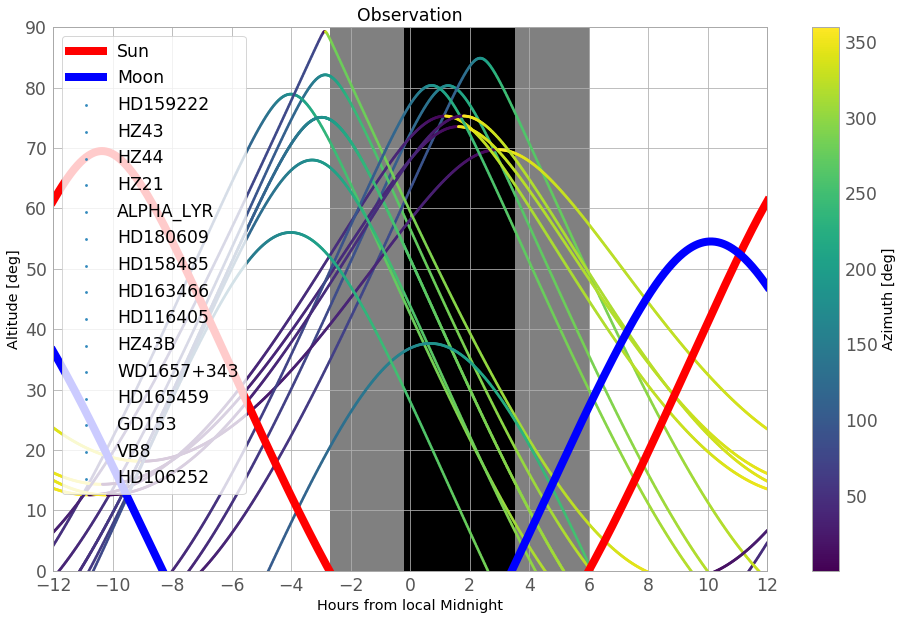

In [75]:
plt.figure(figsize=(16.,10.))
plt.plot(delta_midnight, sunaltazs_ofthenight.alt, color='r',lw=8, label='Sun')
plt.plot(delta_midnight, moonaltazs_ofthenight.alt, color='b',lw=8, label='Moon')

for key, starobj in All_CALSPEC_Stars_InSkyCoord.iteritems():
    star_traj_insky=starobj.getSkyCoord().transform_to(frame_all_times_offthenight)
    alt_max=np.max(star_traj_insky.alt)
    az_max=star_traj_insky.az[np.where(star_traj_insky.alt==alt_max)]
    delta_tt=delta_midnight[np.where(star_traj_insky.alt==alt_max)][0]
    if alt_max>30*u.deg and delta_tt<5*u.hour and delta_tt>-5*u.hour:
        print 'star :: ',key,'alt=',alt_max,'azim = ',az_max,'delta_time=',delta_tt
        plt.scatter(delta_midnight, star_traj_insky.alt,c=star_traj_insky.az, label=key, lw=0, s=8,cmap='viridis')
        selected_star_forObs.append(key)
        filen=starobj.getCalspecFile()
        selected_star_forObs_Filename.append(filen)
    
# plot astronomical crepuscule
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_ofthenight.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_ofthenight.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(0, 90)
plt.title('Observation')
plt.xlabel('Hours from local Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

In [76]:
selected_star_forObs

['HD159222',
 'HZ43',
 'HZ44',
 'HZ21',
 'ALPHA_LYR',
 'HD180609',
 'HD158485',
 'HD163466',
 'HD116405',
 'HZ43B',
 'WD1657+343',
 'HD165459',
 'GD153',
 'VB8',
 'HD106252']

In [77]:
selected_star_forObs_Filename

['hd159222_stis_001.fits',
 'hz43_stis_002.fits',
 'hz44_stis_002.fits',
 'hz21_stis_002.fits',
 'alpha_lyr_stis_006.fits',
 'hd180609_stis_001.fits',
 'hd158485_stis_001.fits',
 'hd163466_stis_001.fits',
 'hd116405_stis_001.fits',
 'hz43b_stis_002.fits',
 'wd1657_343_stisnic_004.fits',
 'hd165459_stisnic_001.fits',
 'gd153_stisnic_004.fits',
 'vb8_stisnic_004.fits',
 'hd106252_stis_001.fits']

## Find the spectrum of these sources

- See AtmCalibAna/tools/pysynphot_tools/CALSPEC_sed/CalSpecSED.ipynb